### Подключение библиотек

In [15]:
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest



from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import category_encoders as ce
from sklearn.feature_selection import SelectPercentile

from sklearn.metrics import mean_absolute_percentage_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.metrics import classification_report, RocCurveDisplay, DetCurveDisplay,PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.inspection import permutation_importance
from collections import defaultdict
from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA
import shap

### Обучение и выполнение лучшей модели

In [17]:
path_train = 'train_house_B.csv'
path_test = 'test_house_B.csv'

df_train = pd.read_csv(path_train)
X_test = pd.read_csv(path_test)

In [18]:
# Блок(и) обучения и поверки модели, а также отбора необходимых значимых столбцов

In [19]:
y = df_train['price']
X = df_train.drop(columns=['price'])
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True)

In [20]:
reg_itog = Ridge(alpha = 1)

In [21]:
rfe_select = RFE(reg_itog, step = 1, 
                 n_features_to_select=15)
rfe_select.fit(X_train, y_train)

RFE(estimator=Ridge(alpha=1), n_features_to_select=15)

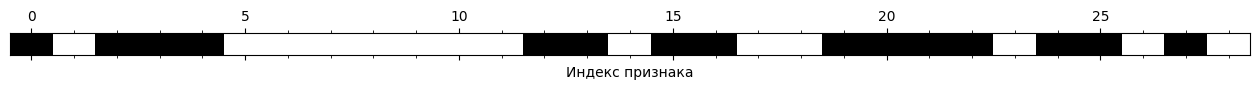

In [22]:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [23]:
X_train_imp = X_train[X_train.columns[mask]]
X_val_imp = X_val[X_train.columns[mask]]
features_names_imp = X_train.columns[mask]

In [24]:
features_names_imp

Index(['0', '2', '3', '4', '12', '13', '15', '16', '19', '20', '21', '22',
       '24', '25', '27'],
      dtype='object')

In [25]:
# Блок предсказания с использованием тестового набора

In [26]:
reg_itog.fit(X[list(features_names_imp)], y)

Ridge(alpha=1)

In [27]:
# Маска отобраных ** НАЗВАНИЙ СТОЛБЦОВ ** для предсказания из тестового набора
mask = list(features_names_imp)
X_test = X_test[mask]
print(mask)

# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = reg_itog.predict(X_test)

['0', '2', '3', '4', '12', '13', '15', '16', '19', '20', '21', '22', '24', '25', '27']


In [28]:
y_predict

array([5140058.944599  , 4201846.18052218, 7981720.1399253 ,
       7545251.92342789, 6937781.15902214, 4007029.34109334,
       4058558.83541569, 4542746.05521354, 3299884.33640179,
       4596382.50041581, 5187634.2994386 , 4514212.99317637,
       3536409.56268368, 5499646.03602374, 6472534.88025566,
       6467212.4674526 , 3320718.12032466, 2878873.9908573 ,
       7303644.91922444, 4051996.5139455 , 3646133.39233307,
       4724083.30302977, 4575957.40242067, 2547926.37749546,
       3602296.31891975, 3018824.45285861, 6981066.75072847,
       2779965.552895  , 6089756.70246534, 6081820.94498601,
       3841040.49656567, 4096312.82652372, 6616232.91138252,
       2130776.08534818, 2906593.19493617, 5303840.5030165 ,
       3342749.34525663, 4594308.85370738, 3651291.05102318,
       6035029.29772012, 5863428.30417652, 8863393.31181156,
       2979562.21752456, 5349033.98143052, 3375180.91866464,
       6142963.53716682, 8490320.46872789, 3726857.50632023,
       5784346.40883665,

(137,) (137,)
Отрицательные цены -  0
Max Error: 4,854,182
 
----------------------
   MAPE Error: 17.81
----------------------


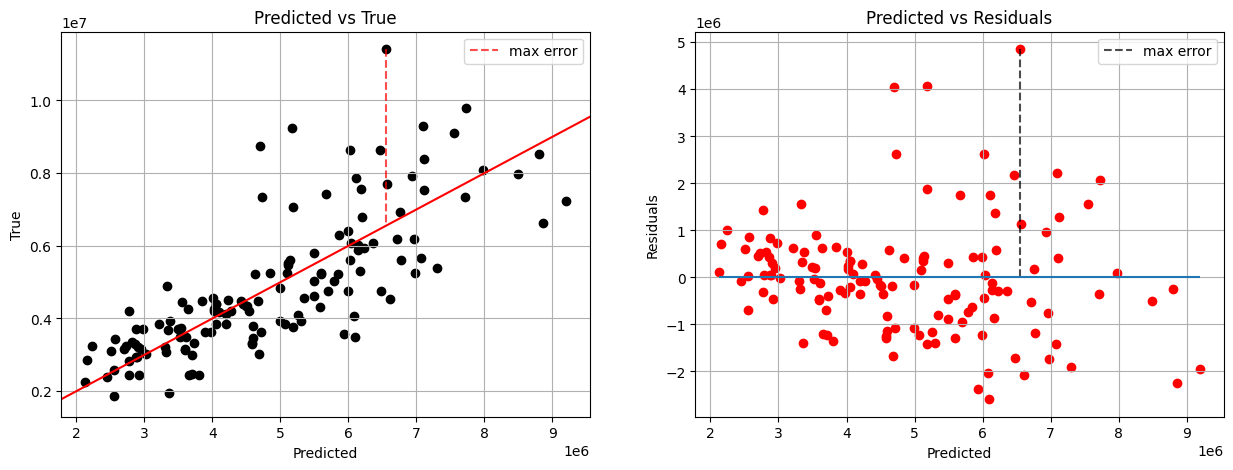

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [30]:
mask = features_names_imp

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
